In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 10)

In [3]:
import os.path
import numpy as np

from neural_noise import plot

import yass
from yass.preprocess.filter import butterworth
from yass.preprocess.standarize import sd, standarize

from yass.process.noise import blocks
from yass.neuralnet import NeuralNetDetector

In [4]:
from neural_noise import plot

In [5]:
yass.set_config('config.yaml')
cfg = yass.read_config()
dims = (49998, 31, 7)

In [6]:
def plot_data(data):
    plt.plot(data[:500, 2])

def plot_matrix(m):
    plt.imshow(m)
    plt.colorbar()
    plt.show()

## Data loading

In [7]:
data = np.fromfile(os.path.join(cfg.root, cfg.filename), dtype='int16')
data = data.reshape(6000000, 49)

In [8]:
data.shape

(6000000, 49)

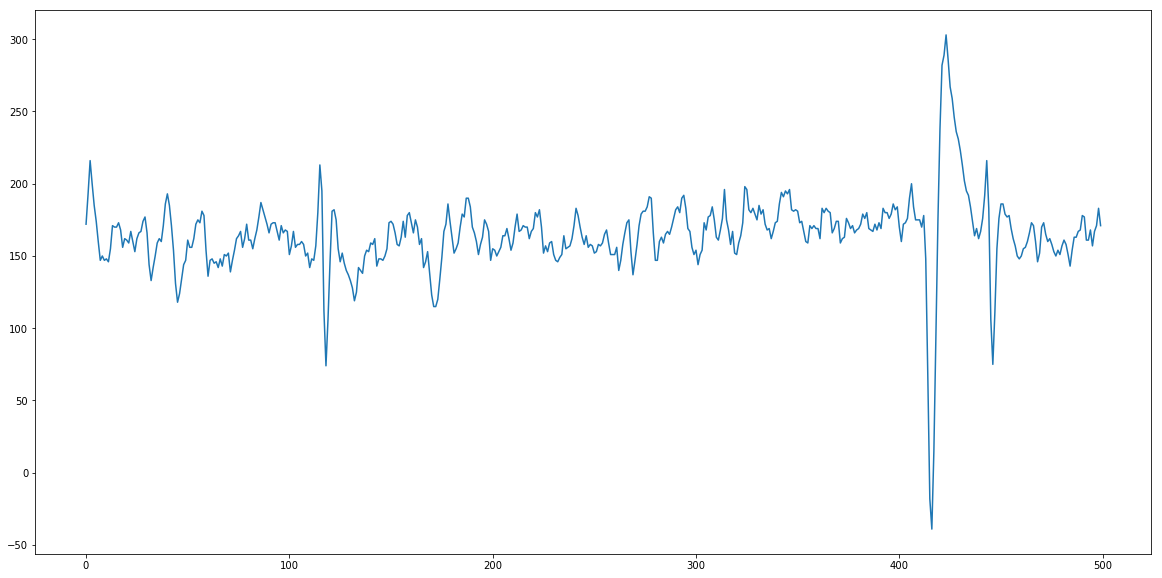

In [9]:
plot_data(data)

## Computing noise spatiotemporal covariance

In [10]:
spatial, temporal = blocks.covariance(data, temporal_size=dims[1], neigbor_steps=1)

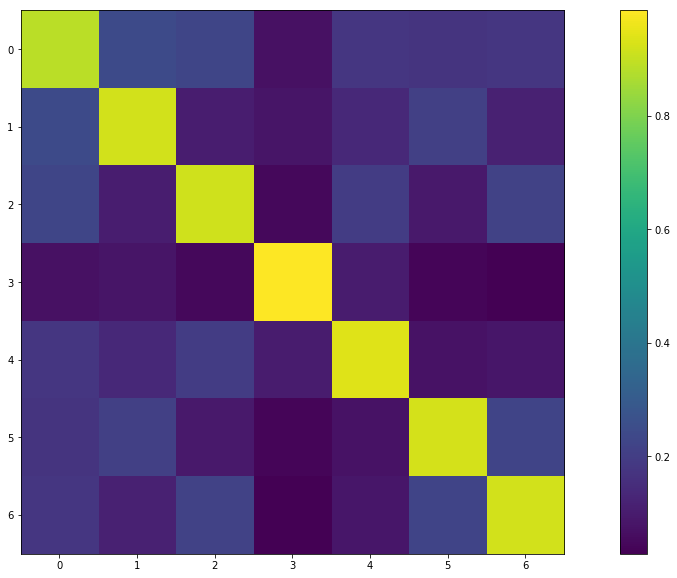

In [11]:
plot_matrix(spatial)

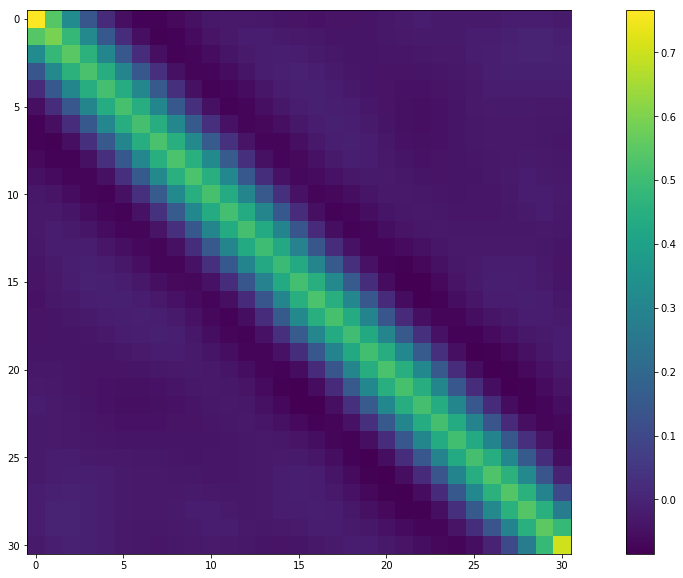

In [12]:
plot_matrix(temporal)

In [13]:
noise = np.random.normal(size=dims)

for c in range(dims[2]):
    noise[:,:,c] = np.matmul(noise[:,:,c], temporal)

reshaped_noise = np.reshape(noise,(-1,noise.shape[2]))

noise = np.reshape(np.matmul(reshaped_noise, spatial), dims) * 1.5

In [14]:
noise[0,:,:].shape

(31, 7)

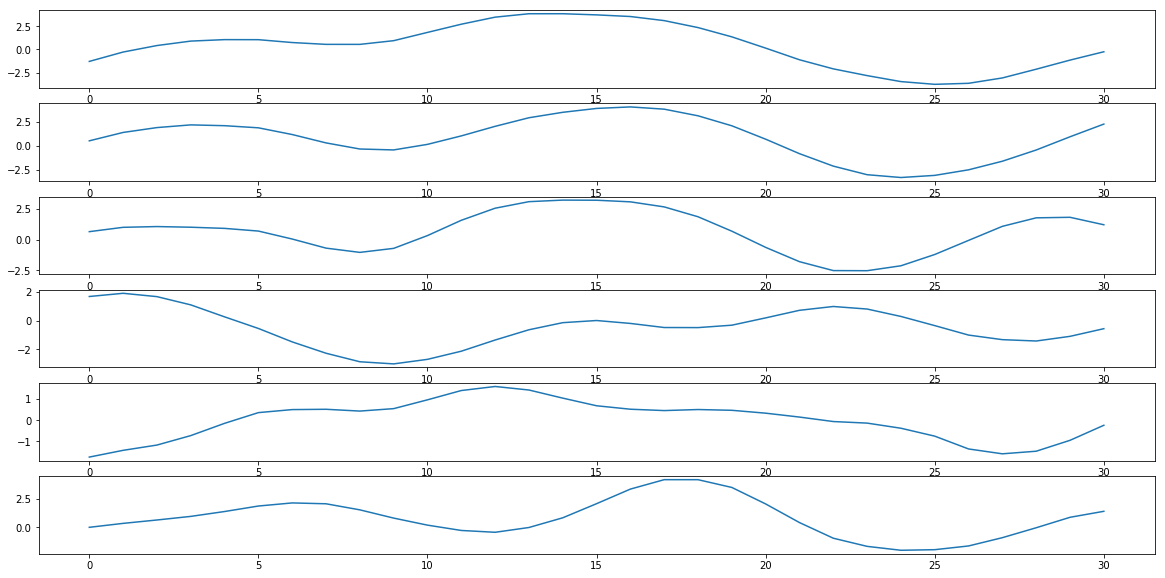

In [15]:
plot.multi_channel_series(noise[10,:,:], range(6))

# Dimensionality reduction

In [16]:
detector = NeuralNetDetector(cfg)

In [17]:
rot = detector.load_w_ae()

INFO:tensorflow:Restoring parameters from /Users/Edu/data/yass/ae_31.ckpt


In [18]:
rot.shape

(31, 3)

In [19]:
noise[10,:,:].shape

(31, 7)

In [20]:
noise_red = np.empty((dims[0], 3, 7))

In [21]:
noise_red.shape

(49998, 3, 7)

In [22]:
for i in range(dims[1]):
    noise_red[i, :, :] = np.matmul(rot.T, noise[i,:,:])

In [23]:
noise_red.shape

(49998, 3, 7)

In [27]:
noise[0,:,:].shape

(31, 7)

In [30]:
noise

array([[[ -2.28778698e+00,  -3.47223249e-01,  -7.72429889e-01, ...,
          -2.86130815e+00,  -3.88858829e-01,  -1.26174045e+00],
        [ -3.09697611e+00,  -6.85449630e-02,  -9.39434742e-01, ...,
          -1.82373692e+00,  -3.06153306e-01,  -1.85792875e+00],
        [ -3.05622204e+00,   5.82440662e-01,  -8.52530078e-01, ...,
          -5.57692505e-01,  -1.32792815e-02,  -2.11185545e+00],
        ..., 
        [ -6.76574890e-01,   1.17926560e+00,   2.20312216e-01, ...,
          -1.51891076e+00,  -1.77962052e+00,  -5.12808908e-01],
        [ -1.18437434e+00,   1.17438875e+00,  -1.39238014e-01, ...,
          -1.15423603e+00,  -1.77154978e+00,  -4.90311018e-01],
        [ -1.18860121e+00,   1.39913522e+00,  -3.20469276e-03, ...,
          -3.22928181e-01,  -1.28136276e+00,  -5.93512005e-02]],

       [[  2.61846989e+00,   3.40555348e+00,   1.21141406e-01, ...,
          -1.34701797e-01,   1.11883210e+00,   1.49903959e+00],
        [  2.01974684e+00,   3.51667920e+00,  -4.14203249e-0

In [29]:
noise[0,:,:].flatten()

array([-2.28778698, -0.34722325, -0.77242989, -0.60694763, -2.86130815,
       -0.38885883, -1.26174045, -3.09697611, -0.06854496, -0.93943474,
       -0.87298858, -1.82373692, -0.30615331, -1.85792875, -3.05622204,
        0.58244066, -0.85253008, -1.07457445, -0.55769251, -0.01327928,
       -2.11185545, -2.07003122,  1.59245487, -0.35390312, -0.8541823 ,
        0.82498519,  0.40147904, -1.68915333, -0.79663971,  2.37743893,
        0.37948384, -0.38599638,  1.76817766,  0.72914202, -1.01303679,
        0.20494655,  2.53952653,  0.99372317,  0.24339479,  2.09324228,
        0.6314992 , -0.50972004,  0.63165802,  1.90546495,  1.14549649,
        0.84377656,  1.87857878, -0.10281084, -0.4681108 ,  0.49417739,
        0.67511455,  0.80669351,  1.3173571 ,  1.45852844, -1.06577649,
       -0.78703235,  0.0839121 , -0.58445856,  0.26622811,  1.51726383,
        1.14582919, -2.00955452, -1.34884491, -0.2382288 , -1.57141379,
       -0.40202522,  1.4553381 ,  0.98695958, -2.42831381, -1.78

In [25]:
detector.get_spikes(noise[0, :, :])

INFO:tensorflow:Restoring parameters from /Users/Edu/data/yass/detectnet1.ckpt
INFO:tensorflow:Restoring parameters from /Users/Edu/data/yass/ae_31.ckpt


ValueError: could not broadcast input array from shape (7,3) into shape (7,2)